In [1]:
##IMPORT NECESSARY LIBARIES 
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
###IMPORT THE DATASET 
credit_card = pd.read_csv('C:/data/Credit Card Customer Data.csv')

In [3]:
credit_card.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [42]:
features = ['Total_visits_bank','Total_visits_online','Total_calls_made']

In [4]:
credit_card.shape

(660, 7)

In [5]:
credit_card.value_counts()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  Total_visits_online  Total_calls_made
1      87073         100000            2                   1                  1                    0                   1
435    52460         45000             4                   2                  1                    2                   1
437    58019         73000             4                   2                  1                    1                   1
438    87219         54000             6                   3                  0                    2                   1
439    36839         31000             7                   2                  1                    4                   1
                                                                                                                      ..
221    79632         8000              1                   0                  3                    10                  1
222    73811         7000            

In [6]:
credit_card.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [7]:
credit_card.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

C:\Users\HP\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


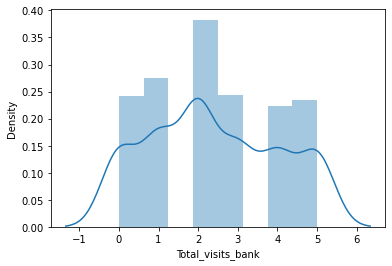

C:\Users\HP\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


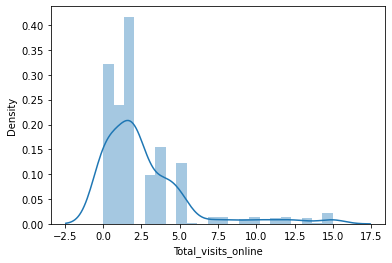

C:\Users\HP\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


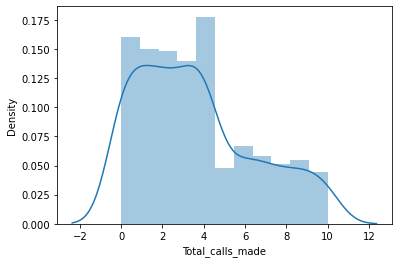

In [45]:
#Checking the distributions of the interactions

for feature in features:
    sns.distplot(credit_card[feature]) 
    plt.show()



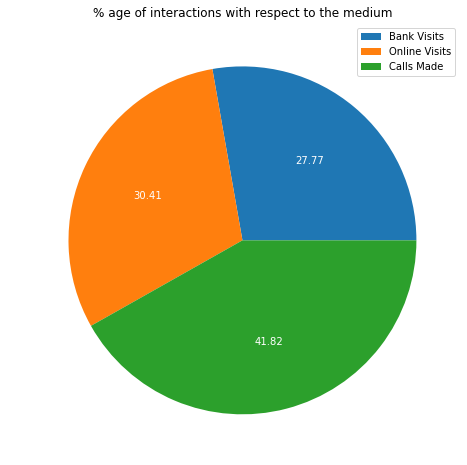

In [43]:
### Creating a new feature with total interaction with banks  for analysis
credit_card=credit_card.copy() 
credit_card['Total_interactions'] = credit_card['Total_visits_bank'] + credit_card['Total_visits_online'] + credit_card['Total_calls_made']
# Total interactions = total calls + totals visits in banks + total online visits
plt.figure(figsize=(12,8))
feature_perc=[]
for feature in features:
    feature_perc.append((credit_card[feature].sum()/credit_card['Total_interactions'].sum())*100)
plt.pie(feature_perc,labels=['Bank Visits','Online Visits','Calls Made'],autopct='%1.2f',textprops=dict(color="w"))
plt.legend()
plt.title("% age of interactions with respect to the medium")
plt.show()

In [15]:
# Identify the duplicated customer keys
duplicate_keys = credit_card.duplicated('Customer Key') == True

In [16]:
# Drop duplicated keys

credit_card = credit_card[duplicate_keys == False]

In [17]:
credit_card.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)

In [19]:
credit_card=credit_card[~credit_card.duplicated()]

In [21]:
credit_card.shape

(644, 5)

Avg_Credit_Limit
Skew : 2.19


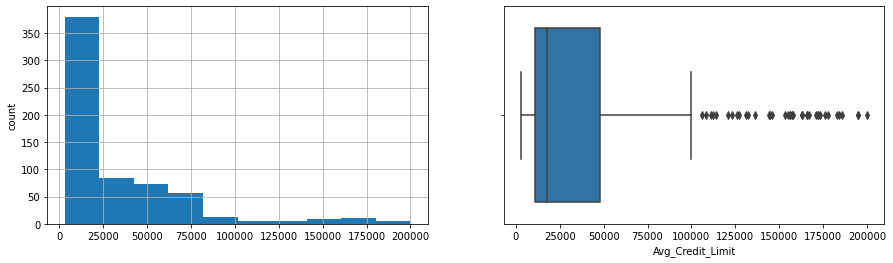

Total_Credit_Cards
Skew : 0.17


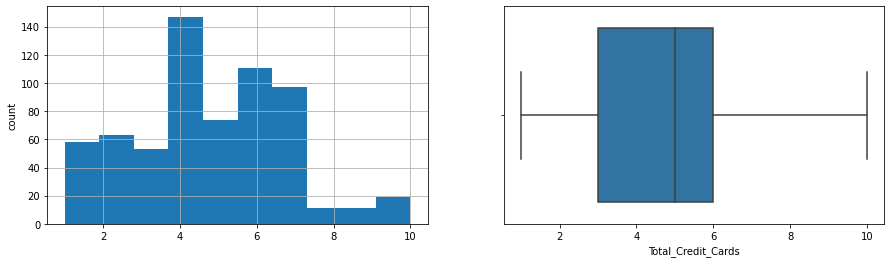

Total_visits_bank
Skew : 0.15


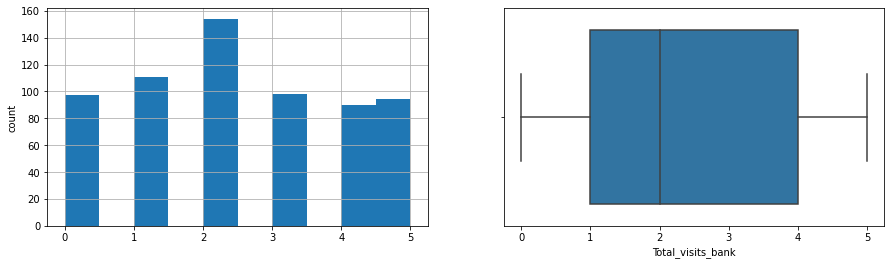

Total_visits_online
Skew : 2.21


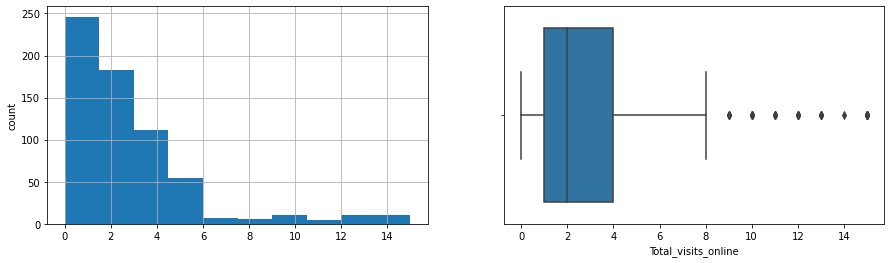

Total_calls_made
Skew : 0.65


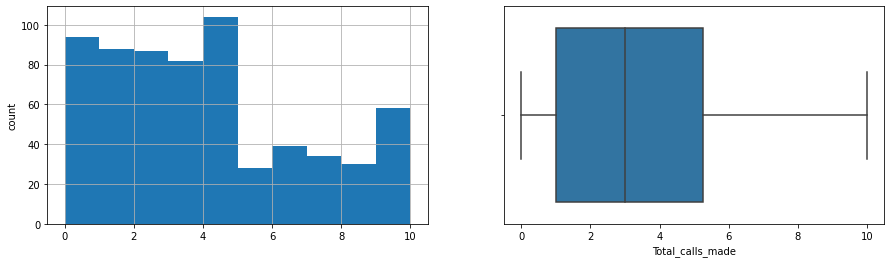

In [24]:
for col in credit_card.columns:
     print(col)
     print('Skew :',round(credit_card[col].skew(),2))
     plt.figure(figsize=(15,4))
     plt.subplot(1,2,1)
     credit_card[col].hist()
     plt.ylabel('count')
     plt.subplot(1,2,2)
     sns.boxplot(x=credit_card[col])
     plt.show()

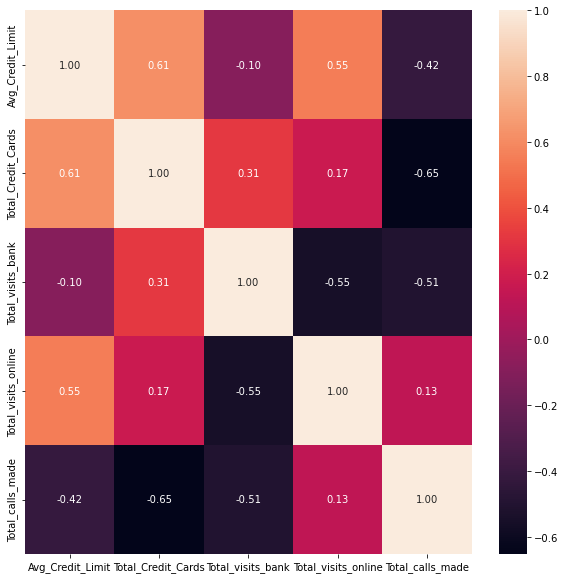

In [25]:
### checking the  correlation among different variables.

plt.figure(figsize=(10,10))
sns.heatmap(credit_card.corr(), annot=True, fmt='0.2f')
plt.show()

In [29]:
###TO SCALE THE DATA 
from sklearn.preprocessing import StandardScaler

In [31]:
#####SCALLING THE DATA

scaler=StandardScaler()
credit_card_scaled=pd.DataFrame(scaler.fit_transform(credit_card), columns=credit_card.columns)

In [32]:
credit_card_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.750192,-1.239437,-0.858684,-0.549573,-1.253982
1,0.413280,-0.779381,-1.473803,2.495669,1.873420
2,0.413280,1.060843,-0.858684,0.127148,0.135974
3,-0.121485,0.140731,-0.858684,-0.549573,0.135974
4,1.750192,0.600787,-1.473803,3.172390,-0.211515


In [33]:
###Creating copy of the data to store labels from each algorithm
credit_card_scaled_copy = credit_card.copy(deep=True)

In [46]:
###Selecting the features
x = credit_card.iloc[:,2:].values 

In [47]:
x

array([[ 1,  1,  0,  1,  2],
       [ 0, 10,  9,  0, 19],
       [ 1,  3,  4,  1,  8],
       ...,
       [ 1,  9,  1,  2, 11],
       [ 1, 15,  0,  2, 16],
       [ 0, 12,  2,  2, 14]], dtype=int64)

In [48]:
x.shape

(644, 5)

In [34]:
###Let us now fit k-means algorithm on our scaled data and find out the optimum number of clusters to use

from sklearn.cluster import KMeans

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: 

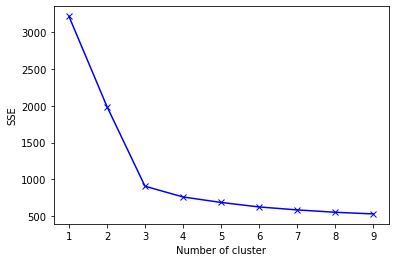

In [36]:
sse = {} 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=1).fit(credit_card_scaled)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [37]:
###Fit the K-means algorithms on the scaled data
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=1) 

kmeans.fit(credit_card_scaled)

credit_card_scaled_copy['Labels'] = kmeans.predict(credit_card_scaled) 
credit_card['Labels'] = kmeans.predict(credit_card_scaled) 

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [39]:


#Number of observations in each cluster
credit_card.Labels.value_counts()



1    374
0    221
2     49
Name: Labels, dtype: int64

In [40]:
#Calculating summary statistics of the original data for each label
mean = credit_card.groupby('Labels').mean()
median = credit_card.groupby('Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmeans.T



,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,33893.048128,140102.040816,12000.0,31500.0,145000.0
Total_Credit_Cards,2.411765,5.508021,8.775510,2.0,6.0,9.0
Total_visits_bank,0.945701,3.489305,0.591837,1.0,3.0,1.0
Total_visits_online,3.561086,0.975936,10.979592,4.0,1.0,11.0
Total_calls_made,6.891403,1.997326,1.102041,7.0,2.0,1.0


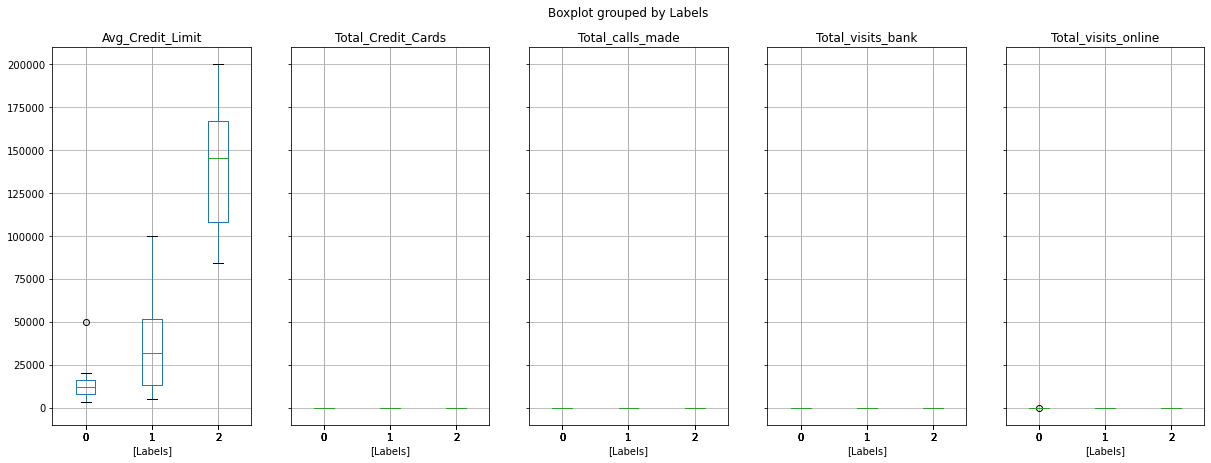

In [41]:
#Visualizing different features w.r.t K-means labels
credit_card_scaled_copy.boxplot(by = 'Labels', layout = (1,5),figsize=(20,7))
plt.show()



In [49]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [52]:
###Converting the cluster to data frame 
convert = pd.DataFrame(y_kmeans,columns=['convert']) 
convert



,convert
0,1
1,2
2,1
3,1
4,0
...,...
639,0
640,0
641,0
642,0
